# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
!pip3 install xgboost

# Cleaning Data

In [ ]:
df=pd.read_csv('train.csv')
df

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6
17992,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2
17993,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8
17994,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8


In [ ]:
df.shape

(17996, 17)

In [ ]:
df.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,17568.000000,17996.000000,17996.000000,15982.000000,17996.000000,17996.000000,17996.000000,17996.000000,13619.000000,17996.000000,17996.000000,17996.000000,1.799600e+04,17996.000000,17996.000000
mean,44.512124,0.543433,0.662777,5.952447,-7.910660,0.636753,0.079707,0.247082,0.177562,0.196170,0.486208,122.623294,2.007445e+05,3.924039,6.695821
std,17.426928,0.166268,0.235373,3.196854,4.049151,0.480949,0.083576,0.310632,0.304048,0.159212,0.240195,29.571527,1.119891e+05,0.361618,3.206073
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000,0.000000
25%,33.000000,0.432000,0.509000,3.000000,-9.538000,0.000000,0.034800,0.004300,0.000089,0.097500,0.297000,99.620750,1.663370e+05,4.000000,5.000000
50%,44.000000,0.545000,0.700000,6.000000,-7.016000,1.000000,0.047400,0.081400,0.003910,0.129000,0.481000,120.065500,2.091600e+05,4.000000,8.000000
75%,56.000000,0.659000,0.860000,9.000000,-5.189000,1.000000,0.083000,0.434000,0.200000,0.258000,0.672000,141.969250,2.524900e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

In [ ]:
df['Artist Name'].unique()

array(['Bruno Mars', 'Boston', 'The Raincoats', ..., 'Micatone',
       'Smash Hit Combo', 'Beherit'], dtype=object)

In [ ]:
df['Track Name'].unique()

array(["That's What I Like (feat. Gucci Mane)", 'Hitch a Ride',
       'No Side to Fall In', ..., 'Peine perdue', "Salomon's Gate",
       'Broken Boy Soldier'], dtype=object)

In [ ]:
len(df['Track Name'].unique())

15129

In [ ]:
for i in range (17):
    print("The number of null values in column",i,"are:")
    nullcheck=df.iloc[:,i].isnull().sum()
    print (nullcheck)

The number of null values in column 0 are:
0
The number of null values in column 1 are:
0
The number of null values in column 2 are:
428
The number of null values in column 3 are:
0
The number of null values in column 4 are:
0
The number of null values in column 5 are:
2014
The number of null values in column 6 are:
0
The number of null values in column 7 are:
0
The number of null values in column 8 are:
0
The number of null values in column 9 are:
0
The number of null values in column 10 are:
4377
The number of null values in column 11 are:
0
The number of null values in column 12 are:
0
The number of null values in column 13 are:
0
The number of null values in column 14 are:
0
The number of null values in column 15 are:
0
The number of null values in column 16 are:
0


You can use this one line code also instead of above one

In [ ]:
df.isnull().sum()

Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

NULL COLUMNS
Popularity
key
instrumentalness

In [1]:
nullpercent=pd.DataFrame(train1.isnull().sum(),columns=['Number of nulll values'])
nullpercent['Fraction of total']=np.round(train1.isnull().sum()/train1.shape[0],2)
nullpercent

NameError: name 'pd' is not defined

In [ ]:
nullpercent=pd.DataFrame(df.isnull().sum(),columns=['Number of null values'])
nullpercent['Percent of total']=np.round(df.isnull().sum()/df.shape[0],2)*100
nullpercent

,Number of null values,Percent of total
Artist Name,0,0.0
Track Name,0,0.0
Popularity,428,2.0
danceability,0,0.0
energy,0,0.0
key,2014,11.0
loudness,0,0.0
mode,0,0.0
speechiness,0,0.0
acousticness,0,0.0


In [ ]:
nullpercent = nullpercent.sort_values(['Number of null values'],ascending=False)
nullpercent

,Number of null values,Percent of total
instrumentalness,4377,24.0
key,2014,11.0
Popularity,428,2.0
Artist Name,0,0.0
time_signature,0,0.0
duration_in min/ms,0,0.0
tempo,0,0.0
valence,0,0.0
liveness,0,0.0
speechiness,0,0.0


In [ ]:
df[df['Popularity'].isnull()]

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
25,"IndianRaga, Akshay Anantapadmanabhan, Madhu Iy...",Swagatham Krishna - Mohanam - Adi,NaN,0.548,0.711,10.0,-8.440,1,0.1070,0.542000,0.000096,0.3550,0.618,119.675,4.015633,3,0
43,Lilly Wood and The Prick,A Song,NaN,0.618,0.438,11.0,-7.495,1,0.0762,0.407000,NaN,0.5000,0.651,155.014,209307.000000,4,6
51,How Lucky,"Kurt Vile, John Prine",NaN,0.523,0.441,5.0,-9.928,1,0.0311,0.465000,0.002680,0.3650,0.490,171.246,3.385117,4,0
95,The Beatles,She's Leaving Home - Remastered,NaN,0.381,0.214,4.0,-11.629,1,0.0337,0.944000,NaN,0.1060,0.393,127.581,3.586000,3,0
111,Faith No More,Falling to Pieces,NaN,0.545,0.919,2.0,-7.679,1,0.0483,0.002690,0.005120,0.0978,0.386,104.364,313573.000000,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17741,Westlife,That's Where You Find Love,NaN,0.464,0.493,2.0,-5.626,1,0.0302,0.273000,NaN,0.2210,0.244,120.990,3.741783,4,9
17855,Avarus,Sadist,NaN,0.502,0.991,6.0,-4.612,1,0.1350,0.000173,0.000017,0.3320,0.285,99.953,191100.000000,4,10
17873,Erika de Casier,Someone to Chill With,NaN,0.610,0.757,2.0,-6.271,0,0.0377,0.075400,0.010600,0.1470,0.468,162.050,199705.000000,4,6
17912,Hype Lights,Something Wrong,NaN,0.385,0.983,4.0,-4.052,0,0.1060,0.000098,0.000010,0.2910,0.354,156.987,162803.000000,4,10


In [ ]:
nullpop=df[df['Popularity'].isnull()]
nullpop.index

Index([   25,    43,    51,    95,   111,   116,   268,   284,   318,   335,
       ...
       17626, 17635, 17689, 17712, 17726, 17741, 17855, 17873, 17912, 17931],
      dtype='int64', length=428)

In [ ]:
df=df.drop(nullpop.index)
df

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6
17992,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2
17993,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8
17994,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8


In [ ]:
df.shape

(17568, 17)

In [ ]:
nullpercent=pd.DataFrame(df.isnull().sum(),columns=['Number of null values'])
nullpercent['Percent of total']=np.round(df.isnull().sum()/df.shape[0],2)*100
nullpercent

,Number of null values,Percent of total
Artist Name,0,0.0
Track Name,0,0.0
Popularity,0,0.0
danceability,0,0.0
energy,0,0.0
key,1955,11.0
loudness,0,0.0
mode,0,0.0
speechiness,0,0.0
acousticness,0,0.0


In [ ]:
nullpercent=nullpercent.sort_values(['Number of null values'],ascending=False)
nullpercent

,Number of null values,Percent of total
instrumentalness,4262,24.0
key,1955,11.0
Artist Name,0,0.0
acousticness,0,0.0
time_signature,0,0.0
duration_in min/ms,0,0.0
tempo,0,0.0
valence,0,0.0
liveness,0,0.0
speechiness,0,0.0


In [ ]:
df[df['key'].isnull()]

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
33,Dreezy,Where Them $ @,42.0,0.858,0.5250,NaN,-7.332,1,0.1480,0.044300,0.007380,0.1970,0.351,170.875,193962.000000,4,5
34,The Ayoub Sisters,Mother's Pride,16.0,0.297,0.0958,NaN,-20.316,1,0.0384,0.844000,0.855000,0.1260,0.296,80.672,3.503783,4,7
36,Moon Guitar,Struna,47.0,0.320,0.2420,NaN,-15.170,1,0.0422,0.941000,0.930000,0.1650,0.431,81.090,2.817633,4,7
41,Lior Narkis,◊ó◊ú◊ß◊™ ◊ê◊ú◊ï◊î◊ô◊ù - ◊î◊©◊ô◊® ◊©◊ú ◊ê◊ï◊§◊ô◊®,44.0,0.479,0.4440,NaN,-6.497,1,0.0316,0.857000,NaN,0.1410,0.236,107.915,174242.000000,4,9
47,The Clash,The Magnificent Seven - Remastered,56.0,0.799,0.7890,NaN,-8.208,1,0.0395,0.059500,NaN,0.0338,0.831,116.083,333520.000000,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17967,Dudu Tassa,◊î◊ß◊ô◊®,23.0,0.483,0.9440,NaN,-3.371,0,0.0427,0.400000,NaN,0.2610,0.829,164.014,227747.000000,4,10
17970,Dua Lipa,Physical,72.0,0.647,0.8440,NaN,-3.756,1,0.0457,0.013700,0.000658,0.1020,0.746,146.962,193829.000000,4,9
17982,Lucia & The Best Boys,Blueheart,29.0,0.348,0.7260,NaN,-4.730,1,0.0449,0.000363,0.000142,0.3830,0.661,182.587,169164.000000,4,6
17985,Hippie Hourrah,La guerre,2.0,0.610,0.7660,NaN,-8.266,1,0.0267,0.000559,0.174000,0.0887,0.932,118.013,271467.000000,4,6


In [ ]:
nullkey=df[df['key'].isnull()]
nullkey.index

Index([   33,    34,    36,    41,    47,    52,    59,    66,    69,    75,
       ...
       17934, 17945, 17957, 17961, 17962, 17967, 17970, 17982, 17985, 17987],
      dtype='int64', length=1955)

In [ ]:
df=df.drop(nullkey.index)
df

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6
17992,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2
17993,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8
17994,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8


In [ ]:
nullpercent=pd.DataFrame(df.isnull().sum(),columns=['Number of null values'])
nullpercent['Percent of total']=np.round(df.isnull().sum()/df.shape[0],2)*100
nullpercent

,Number of null values,Percent of total
Artist Name,0,0.0
Track Name,0,0.0
Popularity,0,0.0
danceability,0,0.0
energy,0,0.0
key,0,0.0
loudness,0,0.0
mode,0,0.0
speechiness,0,0.0
acousticness,0,0.0


In [ ]:
nullpercent=nullpercent.sort_values(['Number of null values'],ascending=False)
nullpercent

,Number of null values,Percent of total
instrumentalness,3800,24.0
Artist Name,0,0.0
acousticness,0,0.0
time_signature,0,0.0
duration_in min/ms,0,0.0
tempo,0,0.0
valence,0,0.0
liveness,0,0.0
speechiness,0,0.0
Track Name,0,0.0


In [ ]:
avg=np.mean(df['instrumentalness'])
avg

0.17899141338186744

In [ ]:
df=df.fillna(value=avg)
df

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,0.178991,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,0.178991,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6
17992,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2
17993,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8
17994,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8


In [ ]:
nullpercent=pd.DataFrame(df.isnull().sum(),columns=['Number of null values'])
nullpercent['Percent of total']=np.round(df.isnull().sum()/df.shape[0],2)*100
nullpercent

,Number of null values,Percent of total
Artist Name,0,0.0
Track Name,0,0.0
Popularity,0,0.0
danceability,0,0.0
energy,0,0.0
key,0,0.0
loudness,0,0.0
mode,0,0.0
speechiness,0,0.0
acousticness,0,0.0


In [ ]:
artist=df['Artist Name'].unique()
list(artist)

['Bruno Mars',
 'Boston',
 'The Raincoats',
 'Deno',
 'Red Hot Chili Peppers',
 'The Stooges',
 'Solomon Burke',
 'Randy Travis',
 'Professional Murder Music',
 'Dudu Aharon',
 'Mohammed Rafi',
 'Arctic Monkeys',
 'Eyal Golan',
 'Harald Lassen, Bram de Looze',
 'Buffalo Springfield',
 'Elmore James',
 'Velvet Two Stripes',
 'Eden Ben Zaken',
 'DaBaby',
 'Mura Masa',
 'Clairmont The Second',
 'Krankhead',
 'The Stone Roses',
 'R3HAB',
 'MC Hammer',
 'duendita',
 'Rainbow',
 'fijitrip',
 'Machine Gun Kelly',
 'ShittyCT',
 'Tetrarch',
 'Brandon Jack & The Artifacts',
 'Ivri Lider',
 'Vieux Farka Tour√©',
 'Kvelertak',
 'Better Than Ezra',
 'Silversun Pickups',
 'Orange Juice',
 'U2',
 'Omer Adam',
 'Victor Manu',
 'The Last Shadow Puppets',
 'Anne-Marie',
 'Veruca Salt',
 'Juice WRLD',
 'BENEE',
 'Berry Sakharof',
 'Ganser',
 'Dion',
 'Soen',
 'Vani Jairam',
 'Liam Gallagher',
 'The Pretty Things',
 'Tha Dogg Pound',
 'BLAB',
 'Trillary Banks',
 'El Goodo',
 'Why Bonnie',
 'Snoop Dogg',
 

Adding a new feature named "collaboration"

In [ ]:
collablambda=lambda x:1 if(len(x.split(','))>1) else 0
df['Collaboration']=df['Artist Name'].apply(collablambda)
df

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class,Collaboration
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,0.178991,0.0849,0.8990,134.071,234596.0,4,5,0
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10,0
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6,0
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,0.178991,0.1220,0.5690,107.033,173968.0,4,5,0
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6,0
17992,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2,0
17993,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8,0
17994,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8,0


In [ ]:
df['Collaboration']

0        0
1        0
2        0
3        0
4        0
        ..
17991    0
17992    0
17993    0
17994    0
17995    0
Name: Collaboration, Length: 15613, dtype: int64

# Exploratory Data Analysis (EDA)

In [ ]:
sns.set()

In [ ]:
df.corr(numeric_only=True)

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class,Collaboration
Popularity,1.000000,0.167841,0.049912,0.005901,0.128904,0.014927,0.034451,-0.128204,-0.141583,-0.074121,0.055601,-0.004236,-0.028111,0.067760,0.156755,-0.051961
danceability,0.167841,1.000000,-0.107789,0.007082,0.049396,-0.068680,0.203774,0.017916,-0.172828,-0.105875,0.444102,-0.187918,-0.128275,0.129610,-0.104809,-0.070131
energy,0.049912,-0.107789,1.000000,0.015435,0.762748,-0.036950,0.124470,-0.743266,-0.151946,0.191197,0.210236,0.204699,0.241118,0.138418,0.210718,-0.158281
key,0.005901,0.007082,0.015435,1.000000,0.002787,-0.111741,0.001881,-0.009717,-0.001664,0.015091,0.030430,0.012491,0.013494,0.007617,-0.008763,-0.006641
loudness,0.128904,0.049396,0.762748,0.002787,1.000000,-0.038943,0.095718,-0.605532,-0.307774,0.105653,0.170883,0.157005,0.163787,0.122890,0.175312,-0.194197
mode,0.014927,-0.068680,-0.036950,-0.111741,-0.038943,1.000000,-0.067925,0.026868,-0.012555,-0.006292,-0.009946,0.016785,-0.069994,-0.016428,-0.044157,0.009623
speechiness,0.034451,0.203774,0.124470,0.001881,0.095718,-0.067925,1.000000,-0.086722,-0.052040,0.071345,0.054440,0.043878,-0.002812,0.053313,-0.067720,-0.043128
acousticness,-0.128204,0.017916,-0.743266,-0.009717,-0.605532,0.026868,-0.086722,1.000000,0.147989,-0.107990,-0.114044,-0.161297,-0.320331,-0.131312,-0.233007,0.213029
instrumentalness,-0.141583,-0.172828,-0.151946,-0.001664,-0.307774,-0.012555,-0.052040,0.147989,1.000000,-0.034856,-0.197926,-0.021640,0.004829,-0.061119,-0.026554,0.064233
liveness,-0.074121,-0.105875,0.191197,0.015091,0.105653,-0.006292,0.071345,-0.107990,-0.034856,1.000000,0.015657,0.023245,0.055559,0.016813,0.038376,-0.004538


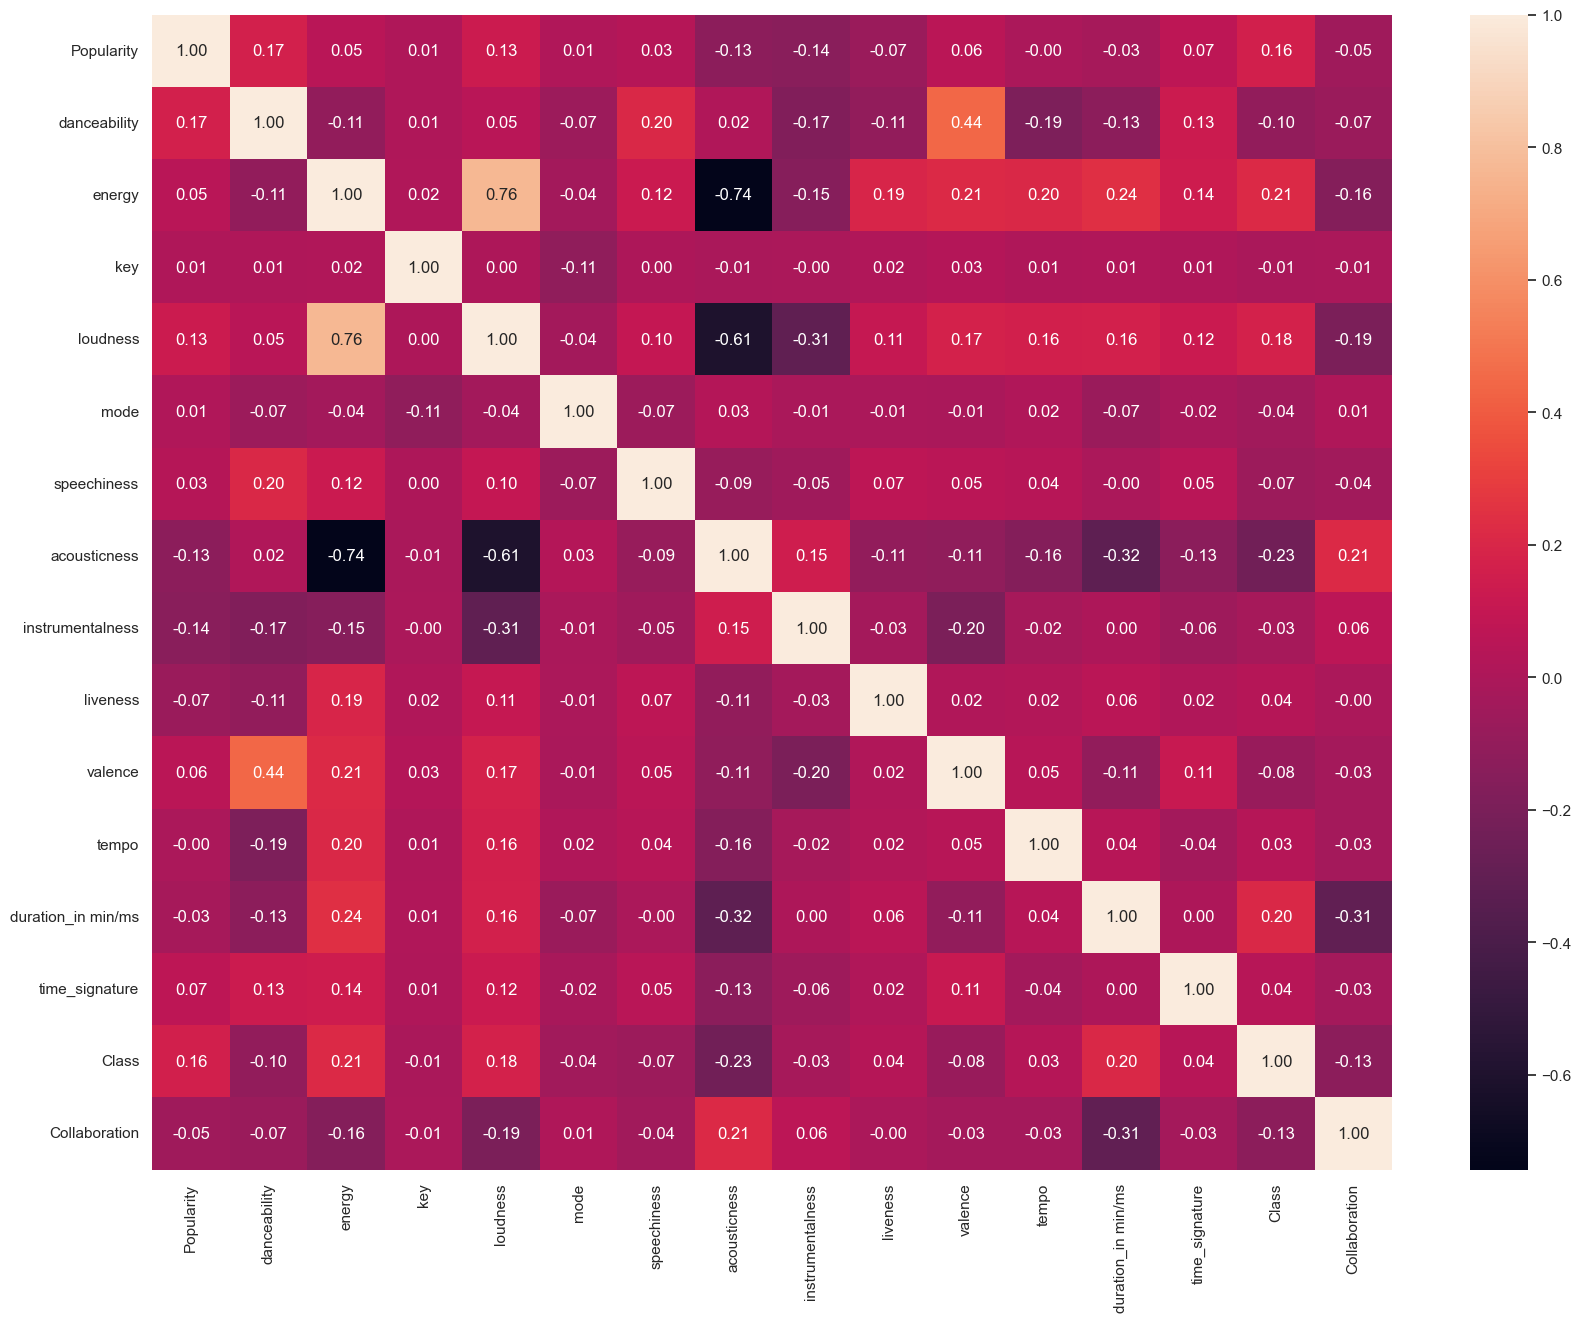

In [ ]:
plt.figure(figsize=(20,15))
correlations=df.corr(numeric_only=True)
sns.heatmap(correlations,annot=True,fmt='0.2f')
plt.show()

<Axes: xlabel='Popularity', ylabel='Density'>

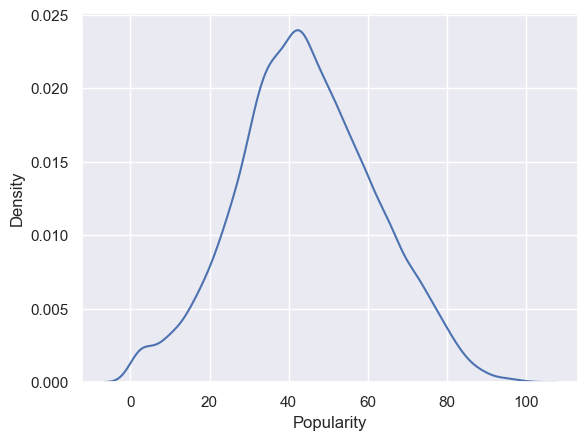

In [ ]:
sns.kdeplot(df['Popularity'])

<Axes: xlabel='danceability', ylabel='Density'>

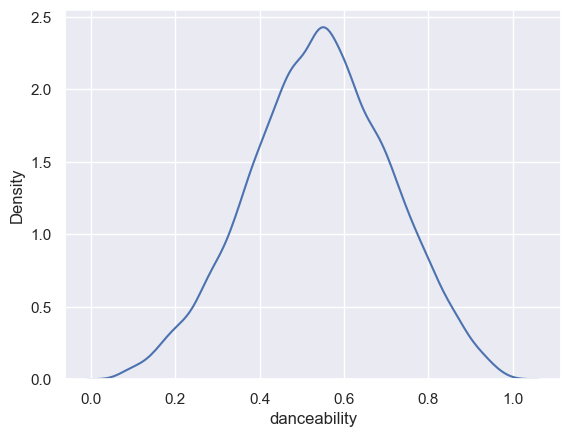

In [ ]:
sns.kdeplot(df['danceability'])

<Axes: xlabel='energy', ylabel='Density'>

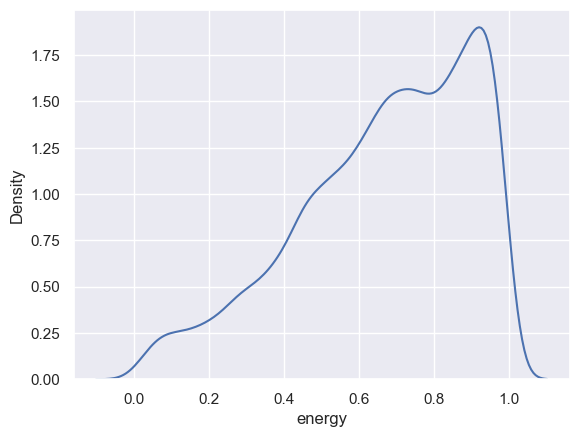

In [ ]:
sns.kdeplot(df['energy'])

<Axes: xlabel='loudness', ylabel='Density'>

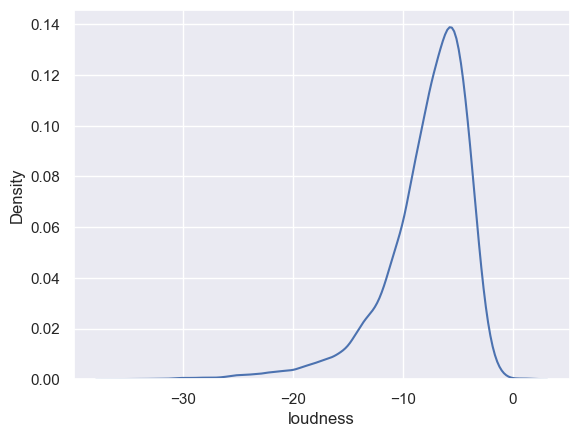

In [ ]:
sns.kdeplot(df['loudness'])

<Axes: xlabel='mode', ylabel='Density'>

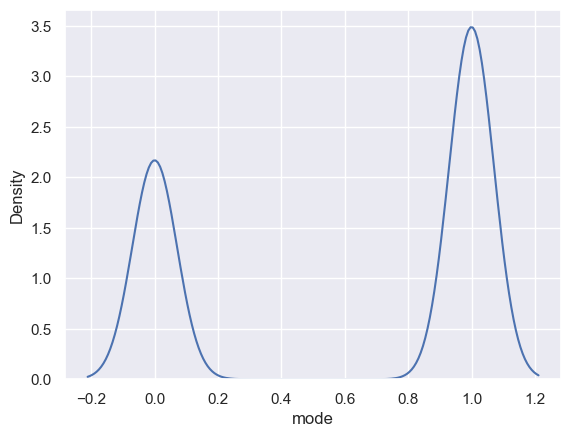

In [ ]:
sns.kdeplot(df['mode'])

In [ ]:
df.columns

Index(['Artist Name', 'Track Name', 'Popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_in min/ms', 'time_signature', 'Class', 'Collaboration'],
      dtype='object')

<Axes: xlabel='speechiness', ylabel='Density'>

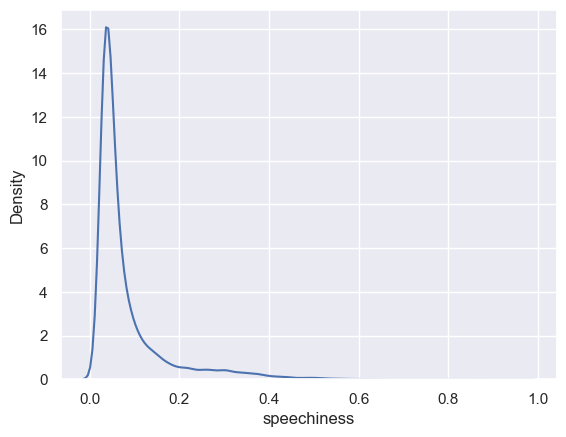

In [ ]:
sns.kdeplot(df['speechiness'])

<Axes: xlabel='acousticness', ylabel='Density'>

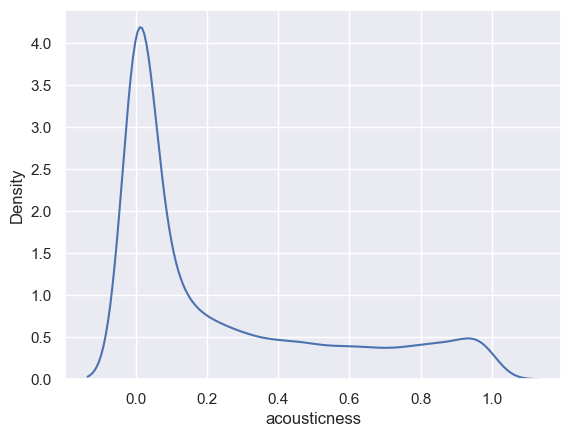

In [ ]:
sns.kdeplot(df['acousticness'])

<Axes: xlabel='instrumentalness', ylabel='Density'>

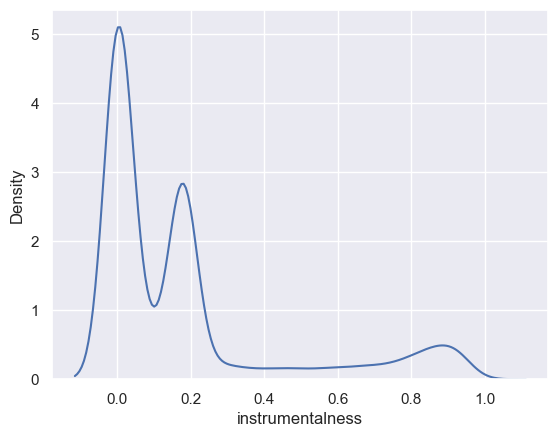

In [ ]:
sns.kdeplot(df['instrumentalness'])

<Axes: xlabel='liveness', ylabel='Density'>

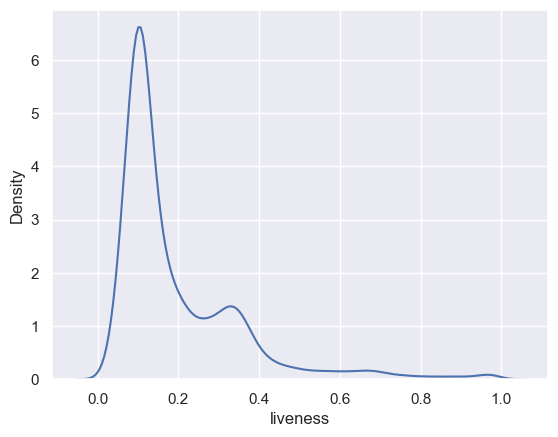

In [ ]:
sns.kdeplot(df['liveness'])

<Axes: xlabel='valence', ylabel='Density'>

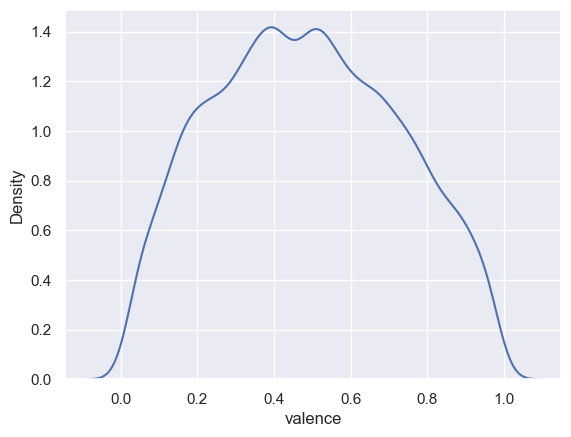

In [ ]:
sns.kdeplot(df['valence'])

<Axes: xlabel='tempo', ylabel='Density'>

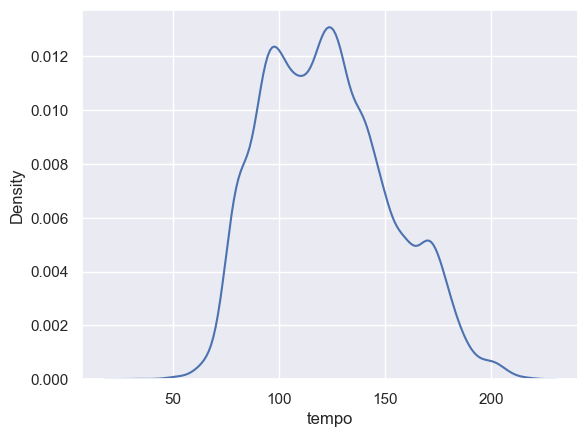

In [ ]:
sns.kdeplot(df['tempo'])

<Axes: xlabel='duration_in min/ms', ylabel='Density'>

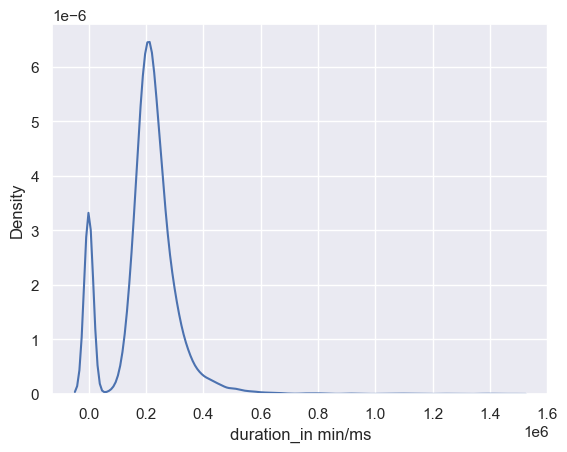

In [ ]:
sns.kdeplot(df['duration_in min/ms'])

<Axes: xlabel='time_signature', ylabel='Density'>

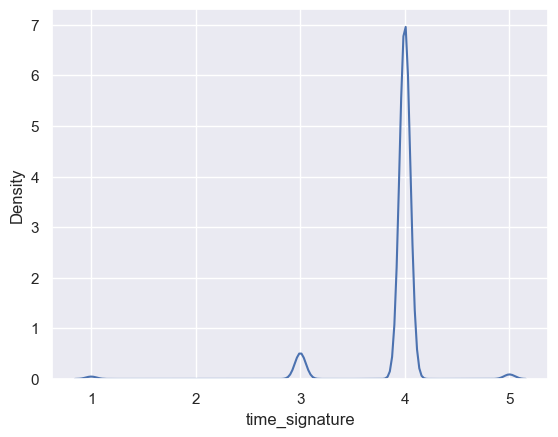

In [ ]:
sns.kdeplot(df['time_signature'])

<Axes: xlabel='Class', ylabel='Density'>

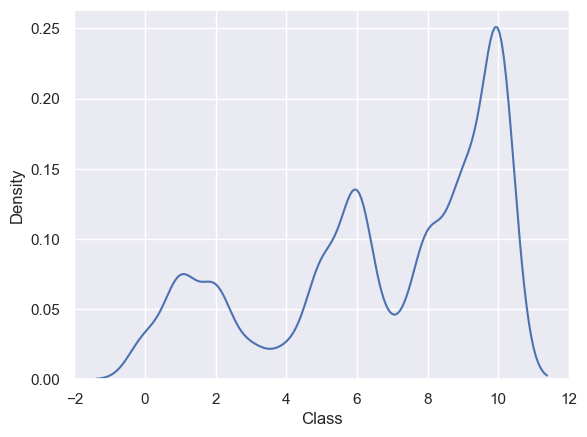

In [ ]:
sns.kdeplot(df['Class'])

<Axes: xlabel='Collaboration', ylabel='Density'>

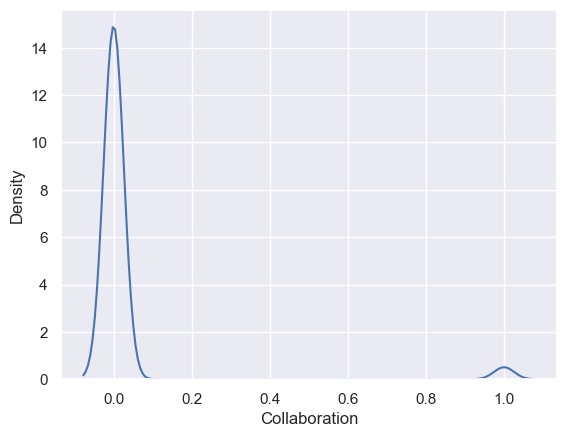

In [ ]:
sns.kdeplot(df['Collaboration'])

In [ ]:
len(df.columns)

18

In [ ]:
df.columns

Index(['Artist Name', 'Track Name', 'Popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_in min/ms', 'time_signature', 'Class', 'Collaboration'],
      dtype='object')

In [ ]:
df.iloc[:,2]

0        60.0
1        54.0
2        35.0
3        66.0
4        53.0
         ... 
17991    35.0
17992    27.0
17993    34.0
17994    29.0
17995    43.0
Name: Popularity, Length: 15613, dtype: float64

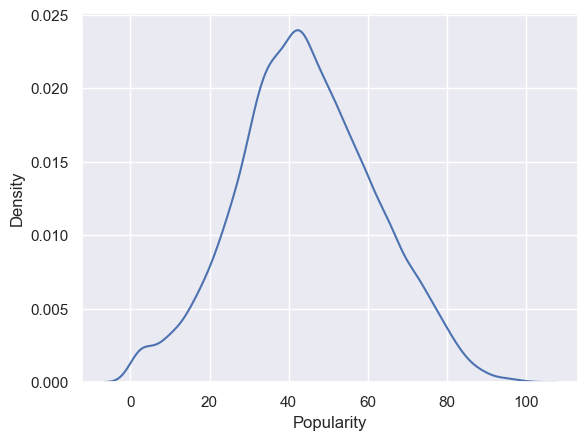

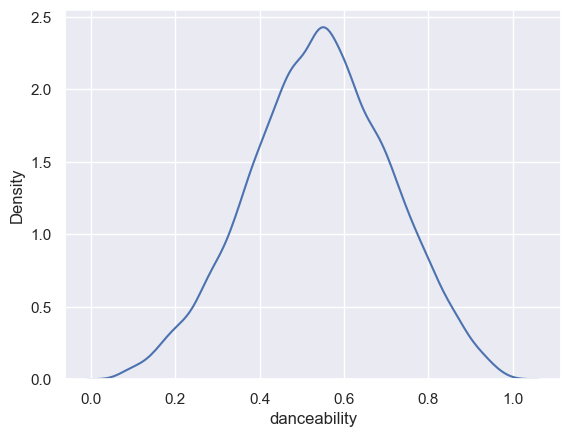

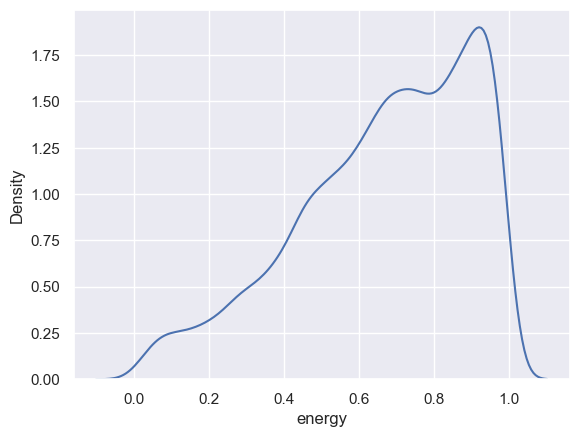

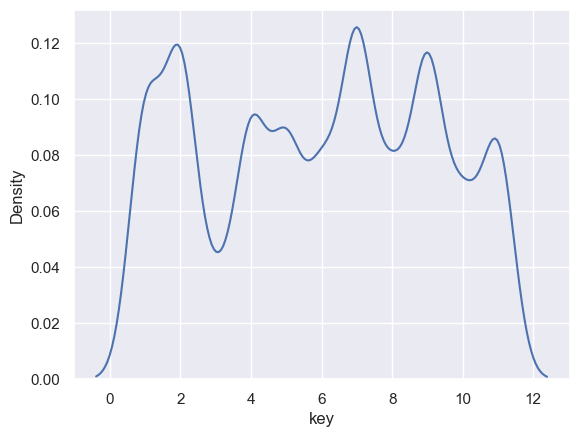

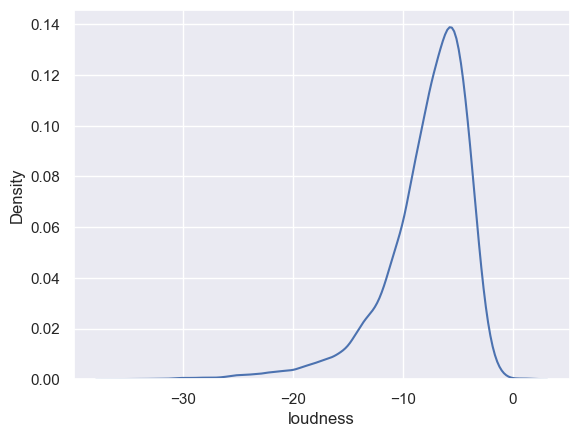

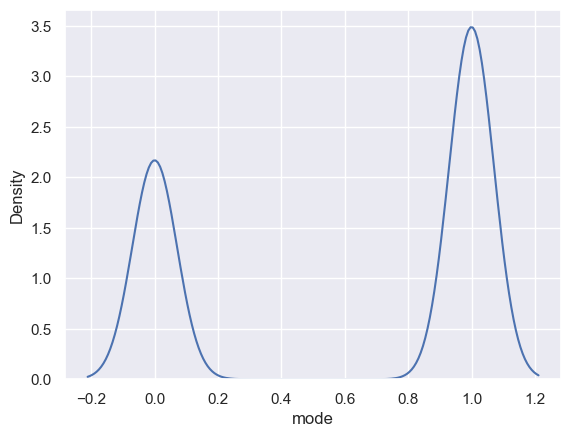

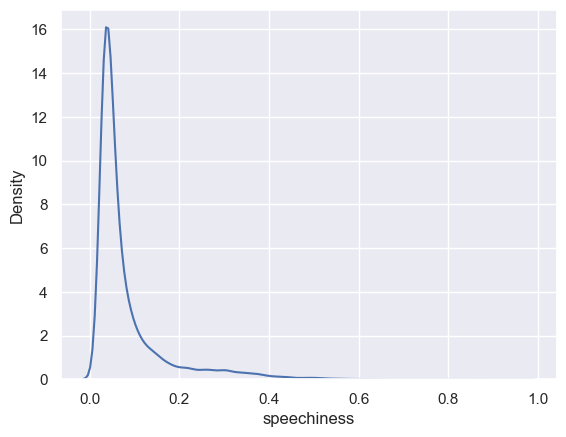

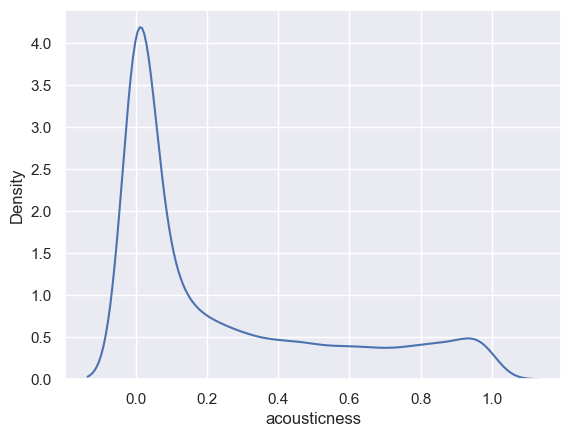

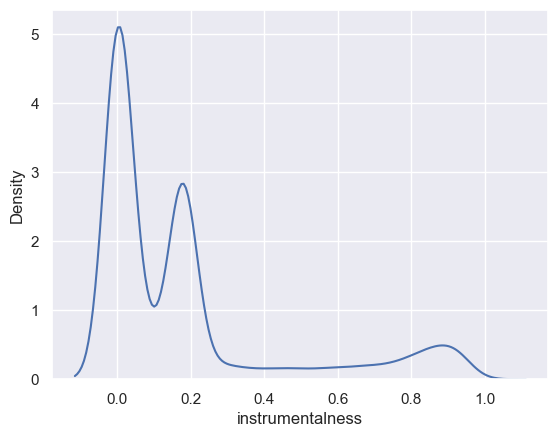

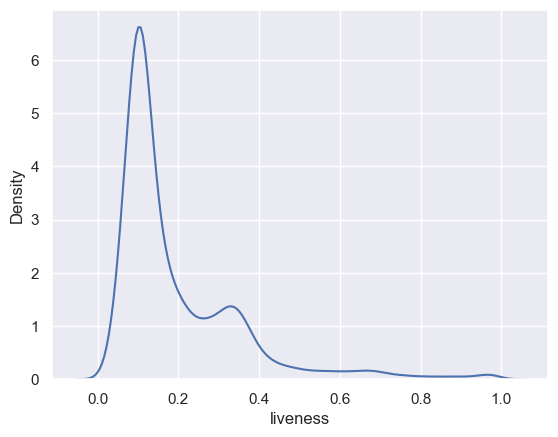

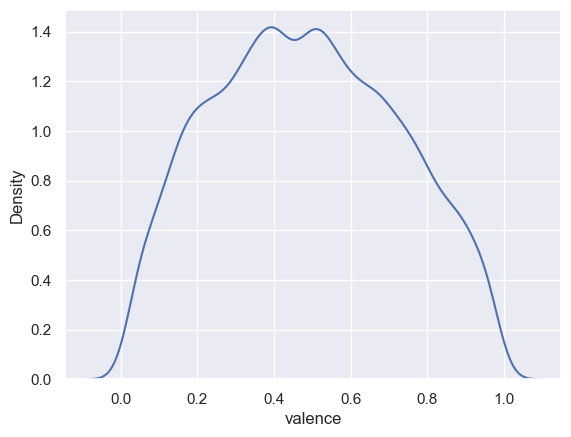

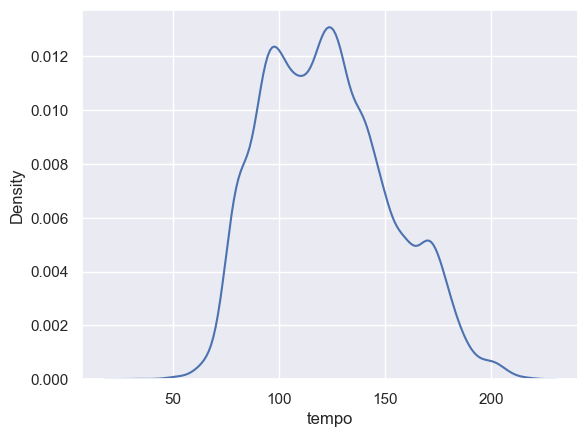

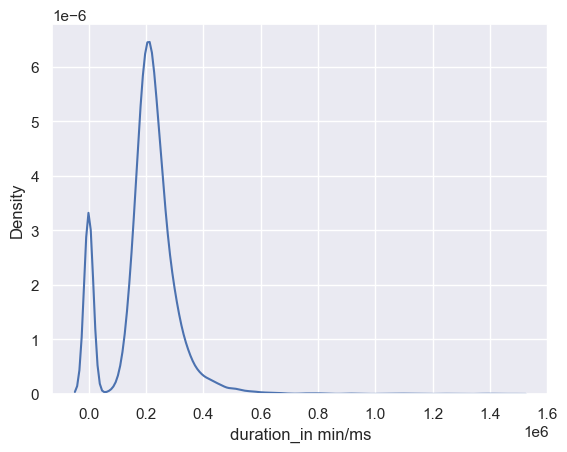

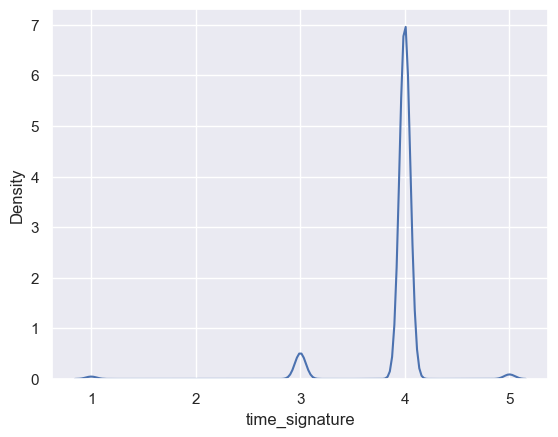

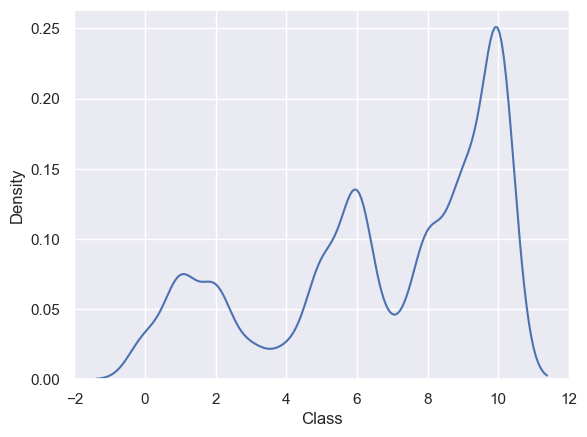

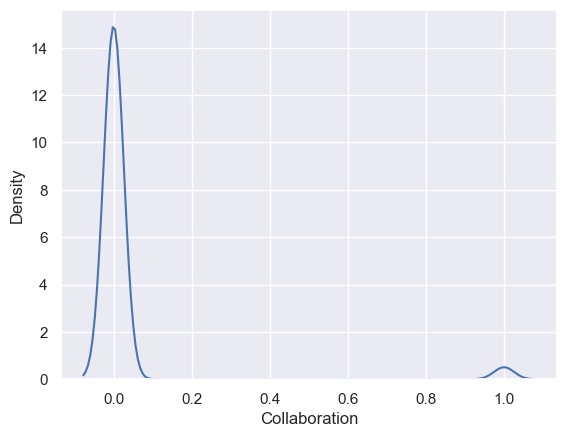

In [ ]:
for i in range(2,len(df.columns)):
    sns.kdeplot(df.iloc[:,i])
    plt.show()

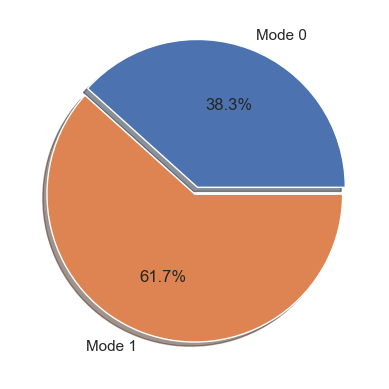

In [ ]:
count1=df[df['mode']==1]
count1=count1.shape[0]

count0=df[df['mode']==0]
count0=count0.shape[0]

plt.pie([count0,count1],labels=['Mode 0','Mode 1'],autopct='%1.1f%%',shadow=True,explode=(0.05,0))
plt.show()

In [ ]:
count0=df[df['Class']==0].shape[0]
count1=df[df['Class']==1].shape[0]
count2=df[df['Class']==2].shape[0]
count3=df[df['Class']==3].shape[0]
count4=df[df['Class']==4].shape[0]
count5=df[df['Class']==5].shape[0]
count6=df[df['Class']==6].shape[0]
count7=df[df['Class']==7].shape[0]
count8=df[df['Class']==8].shape[0]
count9=df[df['Class']==9].shape[0]
count10=df[df['Class']==10].shape[0]

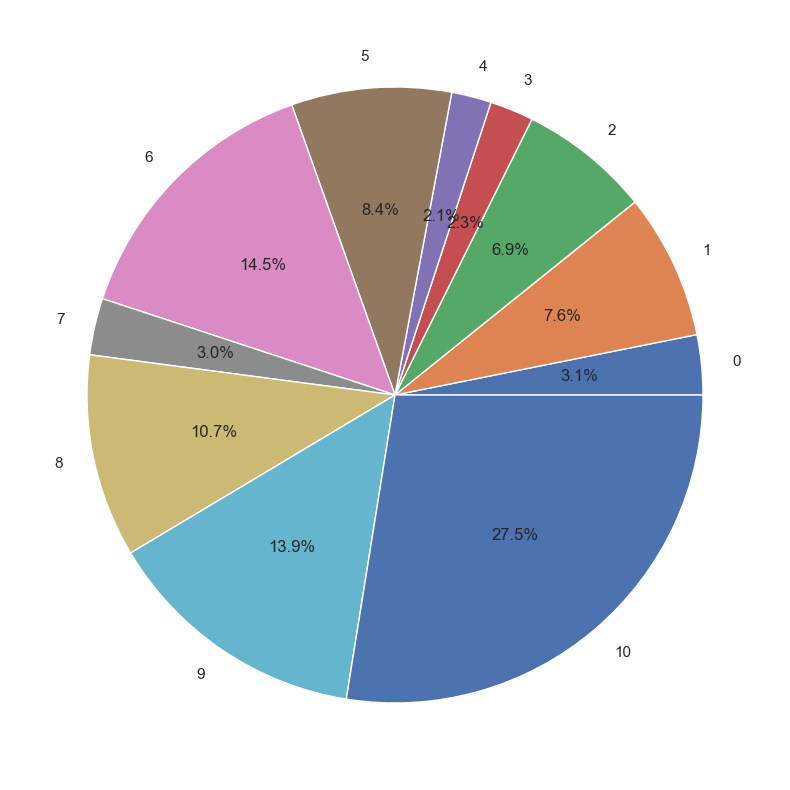

In [ ]:
plt.figure(figsize=(10,10))
plt.pie([count0,count1,count2,count3,count4,count5,count6,count7,count8,count9,count10],labels=['0','1','2','3','4','5','6','7','8','9','10'],autopct='%1.1f%%')
plt.show()

In [ ]:
count=[]
for i in range(len(df['Class'].unique())):
    count.append(df[df['Class']==i].shape[0])

count

[491, 1192, 1075, 358, 326, 1311, 2263, 465, 1664, 2170, 4298]

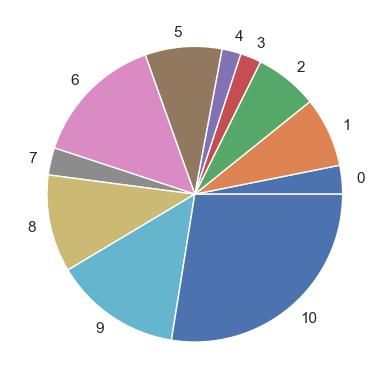

In [ ]:
plt.pie(count,labels=['0','1','2','3','4','5','6','7','8','9','10'])
plt.show()

In [ ]:
top5=df.sort_values(by=['Popularity'],ascending=False)
top5=top5[0:5]
top5

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class,Collaboration
13489,Måneskin,Beggin',100.0,0.714,0.800,11.0,-4.808,0,0.0504,0.1270,0.178991,0.3590,0.589,134.002,3.526000,4,9,0
11781,Lil Nas X,MONTERO (Call Me By Your Name),100.0,0.610,0.508,8.0,-6.682,0,0.1520,0.2970,0.178991,0.3840,0.758,178.818,137876.000000,4,9,0
187,Olivia Rodrigo,good 4 u,99.0,0.563,0.664,9.0,-5.044,1,0.1540,0.3350,0.178991,0.0849,0.688,166.928,2.969117,4,9,0
953,Doja Cat,Kiss Me More (feat. SZA),98.0,0.762,0.701,8.0,-3.541,1,0.0286,0.2350,0.000158,0.1230,0.742,110.968,208867.000000,4,5,0
14830,"The Kid LAROI, Justin Bieber",STAY (with Justin Bieber),97.0,0.591,0.764,1.0,-5.484,1,0.0483,0.0383,0.178991,0.1030,0.478,169.928,2.363433,4,9,1


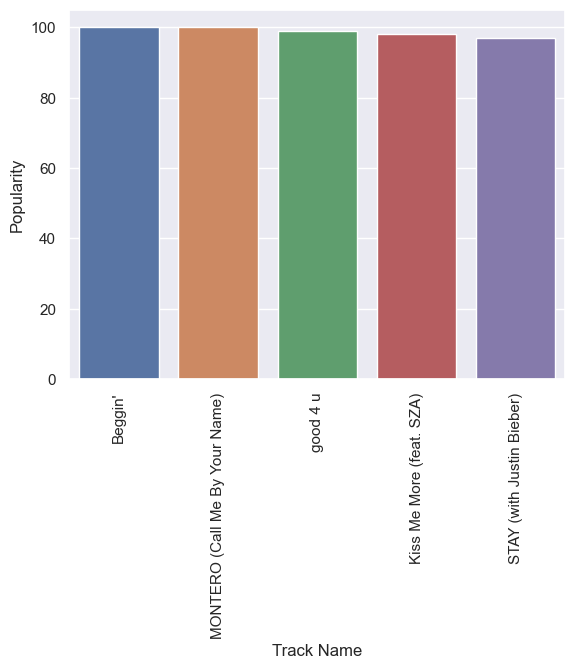

In [ ]:
sns.barplot(x=top5['Track Name'],y=top5["Popularity"])
plt.xticks(rotation=90)
plt.show()

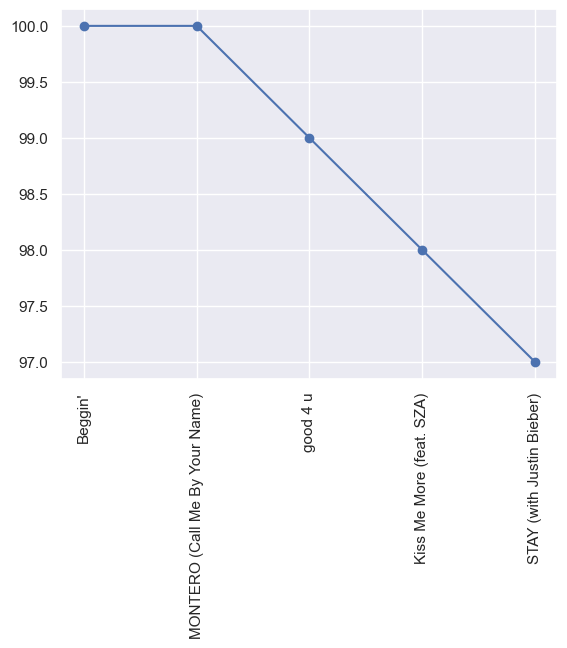

In [ ]:
plt.scatter(top5['Track Name'],top5['Popularity'])
plt.xticks(rotation=90)
plt.plot(top5['Track Name'],top5['Popularity'])
plt.show()

In [ ]:
top5longest=df.sort_values(by=['duration_in min/ms'],ascending=False)
top5longest=top5longest[0:5]

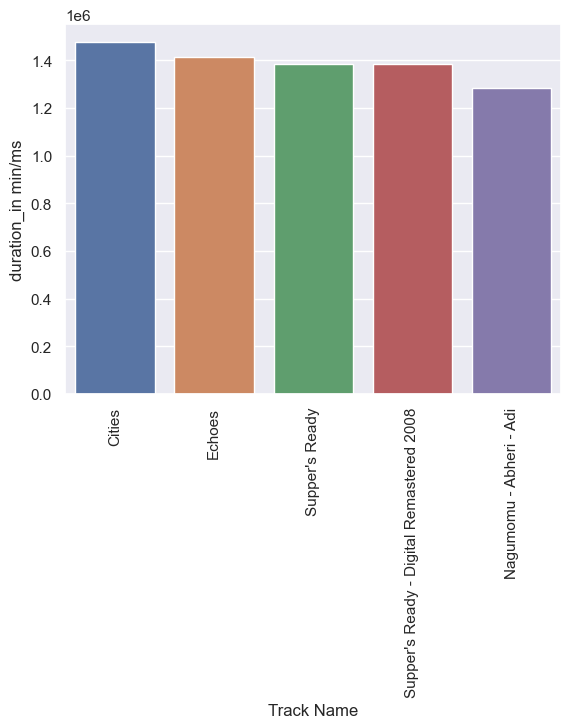

In [ ]:
sns.barplot(y=top5longest['duration_in min/ms'],x=top5longest['Track Name'])
plt.xticks(rotation=90)
plt.show()

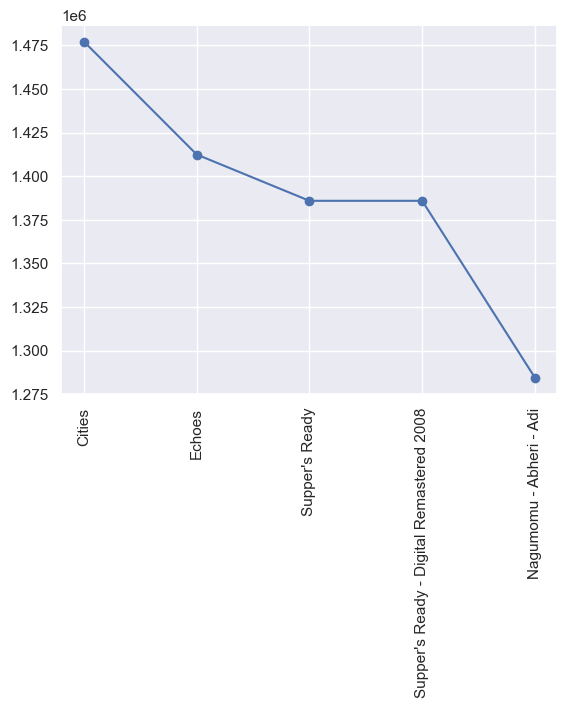

In [ ]:
plt.plot(top5longest['Track Name'],top5longest['duration_in min/ms'])
plt.scatter(top5longest['Track Name'],top5longest['duration_in min/ms'])
plt.xticks(rotation=90)
plt.show()

# Model Training and Building

In [ ]:
df=df.reset_index(drop=True)
df

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class,Collaboration
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,0.178991,0.0849,0.8990,134.071,234596.0,4,5,0
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10,0
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6,0
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,0.178991,0.1220,0.5690,107.033,173968.0,4,5,0
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15608,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6,0
15609,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2,0
15610,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8,0
15611,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8,0


In [ ]:
df.columns

Index(['Artist Name', 'Track Name', 'Popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_in min/ms', 'time_signature', 'Class', 'Collaboration'],
      dtype='object')

In [ ]:
df2=df.drop(['Artist Name','Track Name','time_signature','Class','Collaboration'],axis=1)
df2

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms
0,60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,0.178991,0.0849,0.8990,134.071,234596.0
1,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0
2,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0
3,66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,0.178991,0.1220,0.5690,107.033,173968.0
4,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15608,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0
15609,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0
15610,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0
15611,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0


In [ ]:
def normalise(feature):
    return (feature-np.mean(feature))/np.std(feature)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df2=scaler.fit_transform(df2)
df2

array([[ 0.89219173,  1.86237823, -0.441135  , ...,  1.7256498 ,
         0.38710811,  0.28217801],
       [ 0.54633771, -0.97147431,  0.62995225, ...,  0.34911506,
        -0.20958453,  0.43689226],
       [-0.54886669, -0.65927021, -0.22691755, ...,  1.25846225,
         0.84808256, -0.84569128],
       ...,
       [-0.60650903,  0.08521647,  1.34543854, ..., -0.93147938,
        -0.59753467,  0.11629603],
       [-0.89472071, -1.97412976,  0.59139311, ..., -0.54354686,
         0.29538741,  0.1476325 ],
       [-0.087728  , -0.86340366,  0.79704187, ..., -0.45177788,
         0.52363919, -0.19061363]])

In [ ]:
df2=pd.DataFrame(df2,columns=['Popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_in min/ms'])
df2

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms
0,0.892192,1.862378,-0.441135,-1.551717,0.727199,0.788432,-0.385493,-0.731701,0.000000,-0.701987,1.725650,0.387108,0.282178
1,0.546338,-0.971474,0.629952,-0.925698,0.158830,0.788432,-0.478702,-0.783482,-0.662174,-0.599960,0.349115,-0.209585,0.436892
2,-0.548867,-0.659270,-0.226918,0.013332,-0.118080,0.788432,-0.338298,0.785790,-0.676607,1.256803,1.258462,0.848083,-0.845691
3,1.238046,1.856374,-0.299751,1.265371,0.334909,-1.268341,-0.302902,-0.718433,0.000000,-0.466882,0.349115,-0.528676,-0.265177
4,0.488695,-2.262318,1.319732,-1.238708,0.899014,0.788432,1.590773,-0.786495,-0.616423,-0.150028,-1.641438,2.588303,0.240324
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15608,-0.548867,-2.268322,-2.390514,0.326342,-2.316809,-1.268341,-0.470443,2.426584,2.440876,-0.616437,-1.286041,1.657785,-0.089291
15609,-1.010005,0.565530,-1.902098,1.578381,-0.579597,-1.268341,-0.569551,1.989686,-0.677288,-0.793241,-0.626973,-1.680842,0.485048
15610,-0.606509,0.085216,1.345439,-0.612688,0.797680,-1.268341,-0.117664,-0.786946,-0.676834,2.980487,-0.931479,-0.597535,0.116296
15611,-0.894721,-1.974130,0.591393,0.013332,-1.227477,-1.268341,0.623288,-0.782867,2.789028,0.382286,-0.543547,0.295387,0.147633


<Axes: xlabel='key', ylabel='Density'>

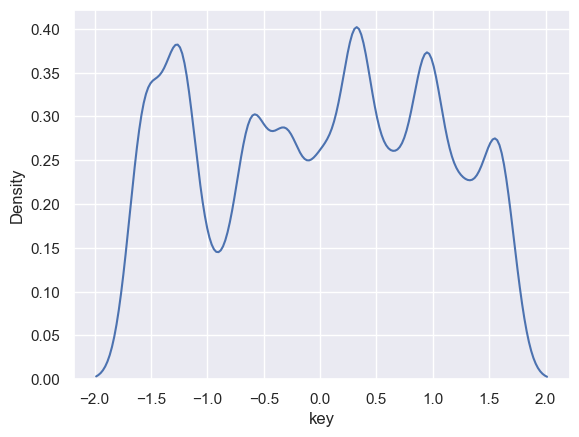

In [ ]:
sns.kdeplot(df2['key'])

In [ ]:
df=df.drop(['Popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_in min/ms'],axis=1)
df

,Artist Name,Track Name,time_signature,Class,Collaboration
0,Bruno Mars,That's What I Like (feat. Gucci Mane),4,5,0
1,Boston,Hitch a Ride,4,10,0
2,The Raincoats,No Side to Fall In,4,6,0
3,Deno,Lingo (feat. J.I & Chunkz),4,5,0
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,4,10,0
...,...,...,...,...,...
15608,Green-House,Find Home,3,6,0
15609,Micatone,All Gone,4,2,0
15610,Smash Hit Combo,Peine perdue,4,8,0
15611,Beherit,Salomon's Gate,4,8,0


In [ ]:
df

,Artist Name,Track Name,time_signature,Class,Collaboration
0,Bruno Mars,That's What I Like (feat. Gucci Mane),4,5,0
1,Boston,Hitch a Ride,4,10,0
2,The Raincoats,No Side to Fall In,4,6,0
3,Deno,Lingo (feat. J.I & Chunkz),4,5,0
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,4,10,0
...,...,...,...,...,...
15608,Green-House,Find Home,3,6,0
15609,Micatone,All Gone,4,2,0
15610,Smash Hit Combo,Peine perdue,4,8,0
15611,Beherit,Salomon's Gate,4,8,0


In [ ]:
df2

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms
0,0.892192,1.862378,-0.441135,-1.551717,0.727199,0.788432,-0.385493,-0.731701,0.000000,-0.701987,1.725650,0.387108,0.282178
1,0.546338,-0.971474,0.629952,-0.925698,0.158830,0.788432,-0.478702,-0.783482,-0.662174,-0.599960,0.349115,-0.209585,0.436892
2,-0.548867,-0.659270,-0.226918,0.013332,-0.118080,0.788432,-0.338298,0.785790,-0.676607,1.256803,1.258462,0.848083,-0.845691
3,1.238046,1.856374,-0.299751,1.265371,0.334909,-1.268341,-0.302902,-0.718433,0.000000,-0.466882,0.349115,-0.528676,-0.265177
4,0.488695,-2.262318,1.319732,-1.238708,0.899014,0.788432,1.590773,-0.786495,-0.616423,-0.150028,-1.641438,2.588303,0.240324
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15608,-0.548867,-2.268322,-2.390514,0.326342,-2.316809,-1.268341,-0.470443,2.426584,2.440876,-0.616437,-1.286041,1.657785,-0.089291
15609,-1.010005,0.565530,-1.902098,1.578381,-0.579597,-1.268341,-0.569551,1.989686,-0.677288,-0.793241,-0.626973,-1.680842,0.485048
15610,-0.606509,0.085216,1.345439,-0.612688,0.797680,-1.268341,-0.117664,-0.786946,-0.676834,2.980487,-0.931479,-0.597535,0.116296
15611,-0.894721,-1.974130,0.591393,0.013332,-1.227477,-1.268341,0.623288,-0.782867,2.789028,0.382286,-0.543547,0.295387,0.147633


In [ ]:
df=pd.concat([df,df2],axis=1)
df

,Artist Name,Track Name,time_signature,Class,Collaboration,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms
0,Bruno Mars,That's What I Like (feat. Gucci Mane),4,5,0,0.892192,1.862378,-0.441135,-1.551717,0.727199,0.788432,-0.385493,-0.731701,0.000000,-0.701987,1.725650,0.387108,0.282178
1,Boston,Hitch a Ride,4,10,0,0.546338,-0.971474,0.629952,-0.925698,0.158830,0.788432,-0.478702,-0.783482,-0.662174,-0.599960,0.349115,-0.209585,0.436892
2,The Raincoats,No Side to Fall In,4,6,0,-0.548867,-0.659270,-0.226918,0.013332,-0.118080,0.788432,-0.338298,0.785790,-0.676607,1.256803,1.258462,0.848083,-0.845691
3,Deno,Lingo (feat. J.I & Chunkz),4,5,0,1.238046,1.856374,-0.299751,1.265371,0.334909,-1.268341,-0.302902,-0.718433,0.000000,-0.466882,0.349115,-0.528676,-0.265177
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,4,10,0,0.488695,-2.262318,1.319732,-1.238708,0.899014,0.788432,1.590773,-0.786495,-0.616423,-0.150028,-1.641438,2.588303,0.240324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15608,Green-House,Find Home,3,6,0,-0.548867,-2.268322,-2.390514,0.326342,-2.316809,-1.268341,-0.470443,2.426584,2.440876,-0.616437,-1.286041,1.657785,-0.089291
15609,Micatone,All Gone,4,2,0,-1.010005,0.565530,-1.902098,1.578381,-0.579597,-1.268341,-0.569551,1.989686,-0.677288,-0.793241,-0.626973,-1.680842,0.485048
15610,Smash Hit Combo,Peine perdue,4,8,0,-0.606509,0.085216,1.345439,-0.612688,0.797680,-1.268341,-0.117664,-0.786946,-0.676834,2.980487,-0.931479,-0.597535,0.116296
15611,Beherit,Salomon's Gate,4,8,0,-0.894721,-1.974130,0.591393,0.013332,-1.227477,-1.268341,0.623288,-0.782867,2.789028,0.382286,-0.543547,0.295387,0.147633


In [ ]:
df=df.drop(['Artist Name','Track Name'],axis=1)
df

,time_signature,Class,Collaboration,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms
0,4,5,0,0.892192,1.862378,-0.441135,-1.551717,0.727199,0.788432,-0.385493,-0.731701,0.000000,-0.701987,1.725650,0.387108,0.282178
1,4,10,0,0.546338,-0.971474,0.629952,-0.925698,0.158830,0.788432,-0.478702,-0.783482,-0.662174,-0.599960,0.349115,-0.209585,0.436892
2,4,6,0,-0.548867,-0.659270,-0.226918,0.013332,-0.118080,0.788432,-0.338298,0.785790,-0.676607,1.256803,1.258462,0.848083,-0.845691
3,4,5,0,1.238046,1.856374,-0.299751,1.265371,0.334909,-1.268341,-0.302902,-0.718433,0.000000,-0.466882,0.349115,-0.528676,-0.265177
4,4,10,0,0.488695,-2.262318,1.319732,-1.238708,0.899014,0.788432,1.590773,-0.786495,-0.616423,-0.150028,-1.641438,2.588303,0.240324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15608,3,6,0,-0.548867,-2.268322,-2.390514,0.326342,-2.316809,-1.268341,-0.470443,2.426584,2.440876,-0.616437,-1.286041,1.657785,-0.089291
15609,4,2,0,-1.010005,0.565530,-1.902098,1.578381,-0.579597,-1.268341,-0.569551,1.989686,-0.677288,-0.793241,-0.626973,-1.680842,0.485048
15610,4,8,0,-0.606509,0.085216,1.345439,-0.612688,0.797680,-1.268341,-0.117664,-0.786946,-0.676834,2.980487,-0.931479,-0.597535,0.116296
15611,4,8,0,-0.894721,-1.974130,0.591393,0.013332,-1.227477,-1.268341,0.623288,-0.782867,2.789028,0.382286,-0.543547,0.295387,0.147633


In [ ]:
Y=df['Class']
Y

0         5
1        10
2         6
3         5
4        10
         ..
15608     6
15609     2
15610     8
15611     8
15612    10
Name: Class, Length: 15613, dtype: int64

In [ ]:
X=df.drop(['Class'],axis=1)
X

,time_signature,Collaboration,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms
0,4,0,0.892192,1.862378,-0.441135,-1.551717,0.727199,0.788432,-0.385493,-0.731701,0.000000,-0.701987,1.725650,0.387108,0.282178
1,4,0,0.546338,-0.971474,0.629952,-0.925698,0.158830,0.788432,-0.478702,-0.783482,-0.662174,-0.599960,0.349115,-0.209585,0.436892
2,4,0,-0.548867,-0.659270,-0.226918,0.013332,-0.118080,0.788432,-0.338298,0.785790,-0.676607,1.256803,1.258462,0.848083,-0.845691
3,4,0,1.238046,1.856374,-0.299751,1.265371,0.334909,-1.268341,-0.302902,-0.718433,0.000000,-0.466882,0.349115,-0.528676,-0.265177
4,4,0,0.488695,-2.262318,1.319732,-1.238708,0.899014,0.788432,1.590773,-0.786495,-0.616423,-0.150028,-1.641438,2.588303,0.240324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15608,3,0,-0.548867,-2.268322,-2.390514,0.326342,-2.316809,-1.268341,-0.470443,2.426584,2.440876,-0.616437,-1.286041,1.657785,-0.089291
15609,4,0,-1.010005,0.565530,-1.902098,1.578381,-0.579597,-1.268341,-0.569551,1.989686,-0.677288,-0.793241,-0.626973,-1.680842,0.485048
15610,4,0,-0.606509,0.085216,1.345439,-0.612688,0.797680,-1.268341,-0.117664,-0.786946,-0.676834,2.980487,-0.931479,-0.597535,0.116296
15611,4,0,-0.894721,-1.974130,0.591393,0.013332,-1.227477,-1.268341,0.623288,-0.782867,2.789028,0.382286,-0.543547,0.295387,0.147633


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,random_state=77)

In [ ]:
X_train

,time_signature,Collaboration,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms
15356,4,0,0.315768,-0.214980,1.195486,1.265371,0.936637,-1.268341,0.138365,-0.741734,0.000000,0.109792,0.349115,1.333715,-0.107492
8475,4,0,-0.491224,0.637578,0.042996,1.578381,0.340427,-1.268341,0.163142,-0.583803,0.000000,-0.978917,0.987327,-0.976408,0.100939
14954,4,0,-0.318297,0.211299,-0.132662,-1.238708,-0.178278,-1.268341,-0.632083,-0.521343,2.811733,1.586331,1.721478,0.339046,0.699790
8125,4,1,-1.644071,0.019173,-0.659637,-1.238708,-1.056164,0.788432,-0.604947,1.125600,1.320737,-0.883861,-1.712350,0.179890,-1.835730
8154,4,0,0.373411,0.229311,0.822748,-0.612688,0.983291,0.788432,-0.486961,-0.786365,-0.204317,-0.707057,0.520139,-0.022824,-0.282610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2283,3,0,-0.087728,-0.929447,-2.133453,1.265371,-1.622777,0.788432,-0.423248,2.167682,-0.381799,-0.517578,-1.248500,-1.519145,-1.835694
10196,4,0,1.641542,0.937774,0.321479,-0.299678,0.272454,-1.268341,-0.112945,-0.553382,-0.602042,-0.542927,-1.202615,-1.039237,0.890707
11860,3,0,-0.721794,-1.637910,-0.394007,1.578381,-0.445155,-1.268341,-0.614386,-0.768530,0.298989,-0.092994,-1.662711,-0.399427,1.621503
8799,4,0,0.603980,0.529507,0.539981,0.013332,0.170368,-1.268341,-0.634443,-0.759436,-0.673981,-0.245084,0.515968,0.452850,0.230212


In [ ]:
X_test

,time_signature,Collaboration,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms
15363,4,0,-0.721794,-0.419113,0.192949,1.265371,-0.085724,0.788432,0.387316,1.093237,2.736048,3.709251,-0.063845,-1.293196,-0.090817
8994,4,0,-0.318297,-0.731317,-1.443673,-0.612688,-1.589919,0.788432,0.611489,2.261534,-0.667548,4.868935,-0.042989,-1.443479,-1.835731
8095,4,0,-0.894721,-0.383090,-1.559350,-0.299678,-1.980704,0.788432,-0.498759,0.462162,-0.676940,-0.441533,-1.477922,-1.104945,-0.292541
1830,4,0,0.085199,0.751652,-0.235486,-1.238708,-0.165988,0.788432,0.481705,-0.742381,-0.676562,-0.593623,-1.152559,1.610401,-0.463505
6435,4,0,0.488695,1.388068,-0.719618,-0.612688,0.171121,0.788432,-0.468083,0.818153,-0.594474,-0.517578,1.571311,-0.053714,0.265124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8822,4,0,1.295688,-0.317046,0.857023,0.013332,1.392135,-1.268341,0.257531,-0.246583,0.000000,1.662376,0.486769,1.535107,-0.127778
988,4,0,-0.779436,-0.160944,0.432872,0.639352,0.783634,-1.268341,-0.453925,-0.786647,2.092725,-0.536589,1.020697,1.672858,0.381487
8417,4,0,0.085199,0.517499,-0.612509,-1.238708,-1.373708,0.788432,-0.496399,-0.757235,0.000000,-0.648756,1.984271,-0.150887,-0.606393
11540,3,0,1.526257,0.109232,-1.216602,0.013332,-1.908968,0.788432,-0.599047,-0.324254,-0.208101,-0.365488,0.474255,-0.978101,0.030872


In [ ]:
Y_train

15356    10
8475      9
14954    10
8125      0
8154      6
         ..
2283      7
10196    10
11860     8
8799     10
15063     5
Name: Class, Length: 12490, dtype: int64

In [ ]:
Y_test

15363     6
8994      9
8095      6
1830      6
6435      2
         ..
8822     10
988       6
8417     10
11540     6
12482    10
Name: Class, Length: 3123, dtype: int64

LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

lr.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
lr.score(X_test,Y_test)

0.4812680115273775

STANDARD VECTOR MACHINES (STANDARD VECTOR CLASSIFIER)

In [ ]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,Y_train)

SVC()

In [ ]:
svc.score(X_test,Y_test)

0.5049631764329171

RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
rfc.score(X_test,Y_test)

0.48927313480627604

K NEIGHBORS CLASSIFIER

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [ ]:
knn.score(X_test,Y_test)

0.4223503041946846

XGBOOST CLASSIIFIER

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
xgb.score(X_test,Y_test)

0.5078450208133205

NAIVE BAYES CLASSIFIER

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,Y_train)

GaussianNB()

In [ ]:
gnb.score(X_test,Y_test)

0.2520012808197246

In [ ]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(lr,X,Y,cv=10)
np.average(scores)

0.49573937715161753

In [ ]:
scores=cross_val_score(svc,X,Y,cv=10)
np.average(scores)

0.5225118341520792

In [ ]:
scores=cross_val_score(rfc,X,Y,cv=10)
np.average(scores)

0.4980458371919244

In [ ]:
scores=cross_val_score(knn,X,Y,cv=10)
np.average(scores)

0.4297686239737651

In [ ]:
scores=cross_val_score(xgb,X,Y,cv=10)
np.average(scores)

0.5099595124764076

In [ ]:
scores=cross_val_score(gnb,X,Y,cv=10)
np.average(scores)

0.25286410677682075

# Evaluation of Metrics

In [ ]:
models=[lr,svc,rfc,knn,xgb,gnb]
accuracies=[]

for i in models:
    scores=cross_val_score(i,X,Y,cv=10)
    accuracies.append(np.mean(scores))

accuracies

[0.49573937715161753,
 0.5225118341520792,
 0.5015041328279503,
 0.4297686239737651,
 0.5099595124764076,
 0.25286410677682075]

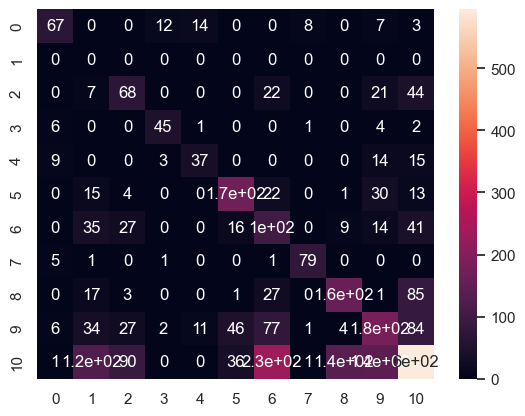

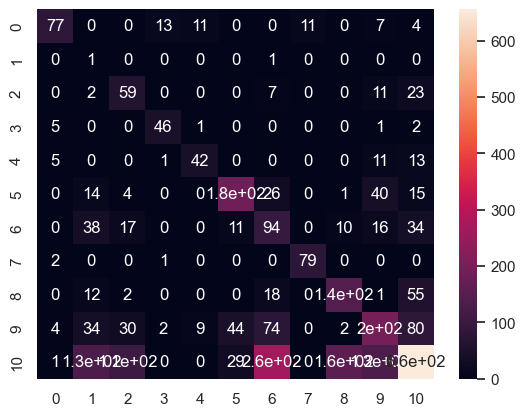

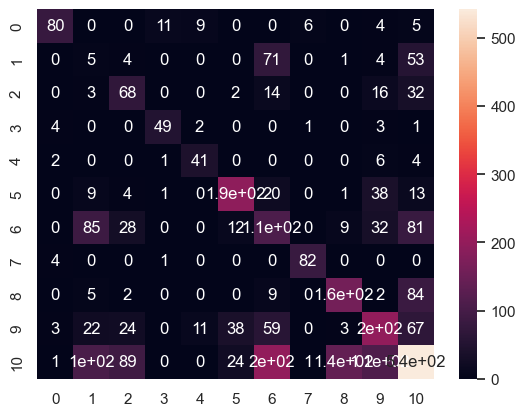

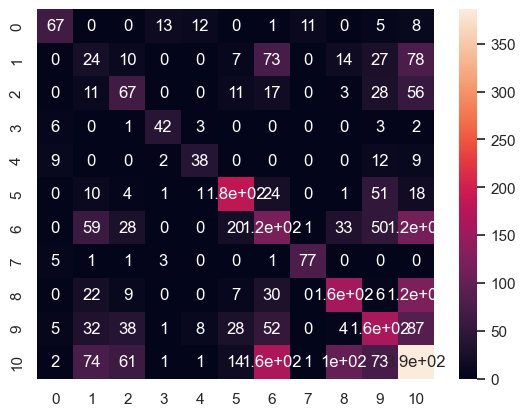

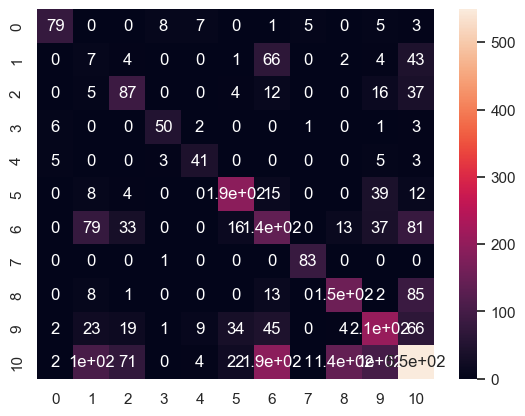

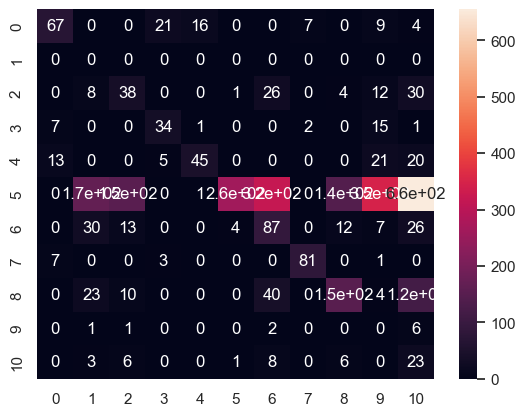

In [ ]:
from sklearn import metrics

for i in models:
    Y_predicted=i.predict(X_test)
    matrix=metrics.confusion_matrix(Y_predicted,Y_test)
    sns.heatmap(matrix,annot=True)
    plt.show()